#Series de Fourier en Tiempo Continuo (*Periódica*)

Este notebook tiene como objetivo utilizar **Series de Fourier** para el análisis de señales **continuas periódicas**, recordando que el resultado es una gráfica **discreta NO periódica**.

Para ello se afronta el problema de 2 maneras:

* A través de la Serie **Trigonométrica** de Fourier. Utilizando los conocimientos obtenidos en asignaturas anteriores, se obtienen los coeficientes. Con los mismos se realiza la reconstrucción de la señal y se la compara con la original, permitiendo observar el Fenómeno de Gibbs.

* A través de la Serie **Exponencial** de Fourier. Para constratar los resultados con los obtenidos en la teoría de la asignatura.


##Instrucciones

* Independientemente de qué método se utilizará, se debe realizar la importación de dependencias.
* Se provee de una función para generar señales. Se proponen 2: 'square' y 'sawtooth'.

##Importación de dependencias

In [22]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

##Generador de señales

Se implementa la función `generarFuncion(tipo, T)` para seleccionar una señal a analizar.
Se propone:

* 'square1' --> Tren de pulsos con alto en A (por defecto igual a 1) y bajo en cero. Periodo $T=2π$ y 50% Duty (Visto en clase teórica).

* 'sawtooth' --> Diente de cierra. Periodo $T=2π$.

In [23]:
def generarFuncion(tipo, T): 
  # tipo --> el nombre de la funcion que se desea utilizar 
  # T --> periodo fundamental
  
  if tipo=='square':

    A = 1

    xt = sym.Piecewise((0,t < 0),
                       (A,t < T/2),
                       (0,t < T),
                       (0,True),)

    INICIO_INT = 0
    FIN_INT = T

  elif tipo=='sawtooth':
    
    xt = sym.Piecewise((0,t < 0),
                       (t,t < T),
                       (0,True),)

    INICIO_INT = 0
    FIN_INT = T

  else:
    raise Exception("Ingrese una función válida!")

  return xt, INICIO_INT, FIN_INT

#A través de la serie **Trigonométrica** de Fourier

Basado en el siguiente recurso --> [espol](http://blog.espol.edu.ec/telg1001/series-de-fourier-de-funciones-periodicas-con-python/)

##Ingreso

In [24]:
# INGRESO

#Se declara la variable simbólica 't'
t = sym.Symbol('t')

#Se define el periodo fundamental
T = 2*np.pi

#Se genera la señal y los limites del intervalo
ft, INICIO_INT, FIN_INT = generarFuncion('square', T)

#Número de coeficientes a generar:
NUM_COEF = 51

# Evaluación para gráfica
RESOLUCION = 100
DIGITOS  = 4    # numpy set_printoptions 
APROX_CERO = 1e-15 #1e-15

##Procedimiento

Recordemos que la Serie **Trigonométrica** de Fourier está dada por la siguiente expresión:

$$f(t)=\frac{a_{0}}{2}+\sum_{k=1}^{\infty}a_{k}cos(kwt)+\sum_{k=1}^{\infty}b_{k}sen(kwt)$$

donde cada coeficiente se calcula con las siguientes expresiones:

$$a_{0}= \frac{2}{T}\int_{T}^{}f(t)dt$$

$$a_{k}= \frac{2}{T}\int_{T}^{}f(t)cos(kwt)dt$$

$$b_{k}= \frac{2}{T}\int_{T}^{}f(t)sen(kwt)dt$$

In [25]:
# Variable simbólica 'k' 
k  = sym.Symbol('k')
w0 = 2*np.pi/T

# Términos ak para coseno
integrando  = ft*sym.cos(k*w0*t)
resultadoIntegral = sym.integrate(integrando,(t,INICIO_INT,FIN_INT))
ak = (2/T)*resultadoIntegral
ak = sym.simplify(ak)

# Términos bk para seno
integrando = ft*sym.sin(k*w0*t)
resultadoIntegral = sym.integrate(integrando,(t,INICIO_INT,FIN_INT))
bk = (2/T)*resultadoIntegral
bk = sym.simplify(bk)

print(' Expresión ak:')
sym.pprint(ak)

print('\n Expresión bk:')
sym.pprint(bk)

# Evalua los coeficientes
a0  = ak.subs(k,0)/2
b0  = bk.subs(k,0)
akValores = [a0]
bkValores = [b0]
i = 1

while not(i>=NUM_COEF):
    aValor = ak.subs(k,i) # Reemplaza el valor de k y evalua la expresión ak
    bValor = bk.subs(k,i) # Reemplaza el valor de k y evalua la expresión bk
    akValores.append(aValor)
    bkValores.append(bValor)

    i = i+1


 Expresión ak:
⎧0.318309886183791⋅sin(3.14159265358979⋅k)                            
⎪─────────────────────────────────────────  for k > -∞ ∧ k < ∞ ∧ k ≠ 0
⎨                    k                                                
⎪                                                                     
⎩                   1.0                             otherwise         

 Expresión bk:
⎧0.318309886183791⋅(1 - cos(3.14159265358979⋅k))                            
⎪───────────────────────────────────────────────  for k > -∞ ∧ k < ∞ ∧ k ≠ 0
⎨                       k                                                   
⎪                                                                           
⎩                       0                                 otherwise         


###Valores ak y bk

In [26]:
import pandas as pd

# Tabla de valores ak, bk utilizando Pandas
tabla = np.concatenate([[np.array(akValores,dtype = float)],
                        [np.array(bkValores,dtype = float)]],
                       axis=0)
tabla = np.transpose(tabla)
np.set_printoptions(precision=DIGITOS)

df_coeficientes = pd.DataFrame(data=tabla, columns=['ak','bk'])

In [27]:
df_coeficientes.head(5)

ak        bk
0  5.000000e-01  0.000000
1  3.898172e-17  0.636620
2 -3.898172e-17  0.000000
3  3.898172e-17  0.212207
4 -3.898172e-17  0.000000

###Expesión de la Serie de Fourier trigonométrica

In [28]:
#Serie de Fourier expresión
serieF = a0 + 0*t 
i = 1
while not(i>=NUM_COEF):
    serieF = serieF + akValores[i]*sym.cos(i*w0*t)
    serieF = serieF + bkValores[i]*sym.sin(i*w0*t)
    i = i+1

print('\nSerie de Fourier fs(t):\n')
print(a0)
for i in range(1,NUM_COEF,1):
    termino = '+ '
    if akValores[i]<0:
        termino = '- '
    aki_str = str(abs(akValores[i]))
    if abs(akValores[i])<APROX_CERO:
        aki_str = '0'
    termino = termino + aki_str+' cos('+str(i*w0)+' t)'
    if bkValores[i]>=0:
        termino = termino + '+ '
    else:
        termino = termino + '- '
    bki_str = str(abs(bkValores[i]))
    if abs(bkValores[i])<APROX_CERO:
        bki_str = '0'
    termino = termino + bki_str+' sin('+str(i*w0)+' t)'
    print(termino)


Serie de Fourier fs(t):

0.500000000000000
+ 0 cos(1.0 t)+ 0.636619772367581 sin(1.0 t)
- 0 cos(2.0 t)+ 0 sin(2.0 t)
+ 0 cos(3.0 t)+ 0.212206590789194 sin(3.0 t)
- 0 cos(4.0 t)+ 0 sin(4.0 t)
+ 0 cos(5.0 t)+ 0.127323954473516 sin(5.0 t)
- 0 cos(6.0 t)+ 0 sin(6.0 t)
+ 0 cos(7.0 t)+ 0.0909456817667973 sin(7.0 t)
- 0 cos(8.0 t)+ 0 sin(8.0 t)
+ 0 cos(9.0 t)+ 0.0707355302630646 sin(9.0 t)
- 0 cos(10.0 t)+ 0 sin(10.0 t)
+ 0 cos(11.0 t)+ 0.0578745247606892 sin(11.0 t)
- 0 cos(12.0 t)+ 0 sin(12.0 t)
- 0 cos(13.0 t)+ 0.0489707517205832 sin(13.0 t)
- 0 cos(14.0 t)+ 0 sin(14.0 t)
+ 0 cos(15.0 t)+ 0.0424413181578388 sin(15.0 t)
- 0 cos(16.0 t)+ 0 sin(16.0 t)
- 0 cos(17.0 t)+ 0.0374482219039754 sin(17.0 t)
- 0 cos(18.0 t)+ 0 sin(18.0 t)
+ 0 cos(19.0 t)+ 0.0335063038088201 sin(19.0 t)
- 0 cos(20.0 t)+ 0 sin(20.0 t)
- 0 cos(21.0 t)+ 0.0303152272555991 sin(21.0 t)
- 0 cos(22.0 t)+ 0 sin(22.0 t)
+ 0 cos(23.0 t)+ 0.0276791205377209 sin(23.0 t)
- 0 cos(24.0 t)+ 0 sin(24.0 t)
- 0 cos(25.0 t)+ 0.0254647908

##Salida

###Señal original vs representación de Fourier

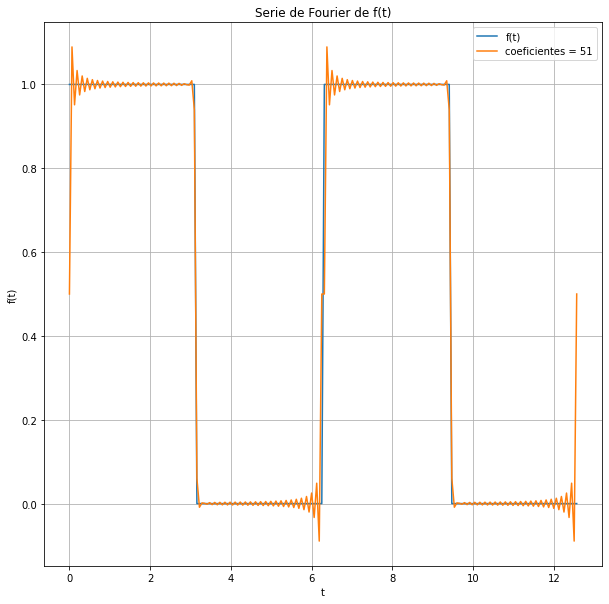

In [29]:
# Transformaciones para evaluacion numerica
ftn = sym.lambdify(t,ft)
fsn = sym.lambdify(t,serieF)

# Evaluacion para grafica
ti = np.linspace(INICIO_INT,FIN_INT,RESOLUCION)
fi = ftn(ti)
fsi = fsn(ti) 

#Para aumentar la grafica y observar la periodicidad
ti = np.linspace(INICIO_INT,2*FIN_INT, 2*RESOLUCION)
fi = np.concatenate((fi,fi))
fsi = np.concatenate((fsi,fsi))

#Grafica f(t) y Fourier en t
figura, graf_ftT0 = plt.subplots(figsize=(10, 10))
graf_ftT0.plot(ti, fi, label = 'f(t)')
etiqueta = 'coeficientes = '+ str(NUM_COEF)
graf_ftT0.plot(ti,fsi,label = etiqueta)
graf_ftT0.set_xlabel('t')
graf_ftT0.set_ylabel('f(t)')
graf_ftT0.legend()
graf_ftT0.grid()
graf_ftT0.set_title('Serie de Fourier de f(t)')

plt.show()

❗  Modifique la cantidad de coeficientes a calcular con `NUM_COEF`

❓ ¿El fenómeno desaparece al aumentar los coeficientes?

❓ ¿Mejora al aumentar la `RESOLUCION` de la gráfica?

[🔍Fenómeno de Gibbs](https://es.wikipedia.org/wiki/Fen%C3%B3meno_de_Gibbs)


###Espectro de amplitud y fase

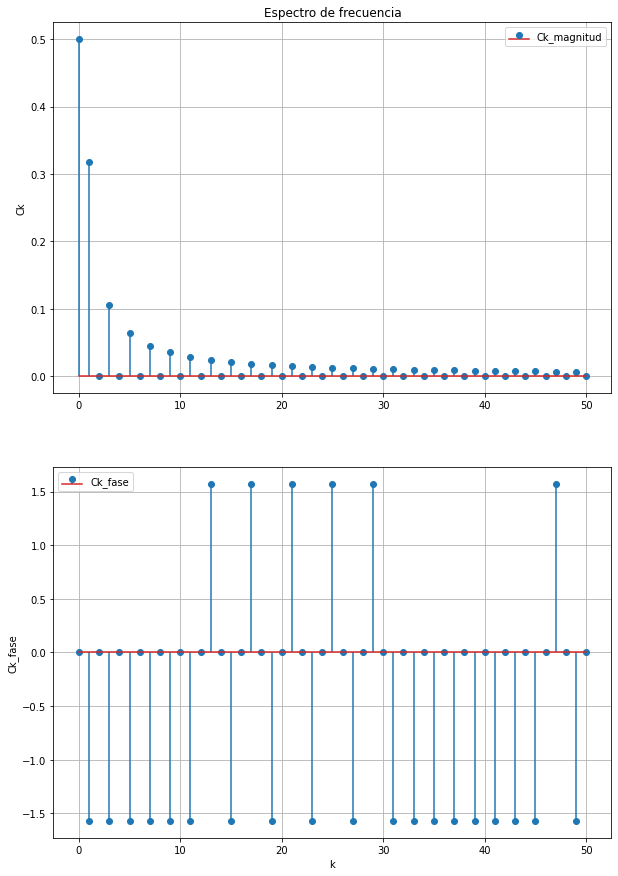

In [30]:
#Espectro de frecuencia Amplitud y Fase
k_i = np.arange(0,NUM_COEF,1,dtype=float)
ak_i = np.array(akValores,dtype=float)
bk_i = np.array(bkValores,dtype=float)

ak_i[0] = ak_i[0]*2 #esta coreccion se realiza porque en trigonometricas se hizo a0/2

#Calculos de los valores de los modulos
ck_i = np.sqrt((ak_i/2)**2 + (bk_i/2)**2)

#Calculos de las fases
cfs_i = np.arctan(-bk_i/ak_i)

#Grafica de espectro de frecuencia
figura, graf_Fw = plt.subplots(2,1, figsize=(10, 15))
graf_Fw[0].stem(k_i, ck_i, label='Ck_magnitud', use_line_collection=True)
graf_Fw[0].set_ylabel('Ck')
graf_Fw[0].set_title('Espectro de frecuencia')
graf_Fw[0].legend()
graf_Fw[0].grid()

graf_Fw[1].stem(k_i,cfs_i,label='Ck_fase', use_line_collection=True)
graf_Fw[1].legend()
graf_Fw[1].set_ylabel('Ck_fase')
graf_Fw[1].set_xlabel('k')
graf_Fw[1].grid()

plt.show()

#A través de la Serie **Exponencial** de Fourier

Basado en el siguiente recurso --> [All Types of Fourier Transforms in PYTHON](https://www.youtube.com/watch?v=GKsCWivmlHg)

##Ingreso

In [31]:
# INGRESO

#Se declaran las variables simbólicas
t, k = sym.symbols('t, k', real=True)

#Periodo Fundamental
T = 2*sym.pi

#Velocidad angular
w = 2*sym.pi/T

#Se genera la señal
x, INICIO_INT, FIN_INT = generarFuncion('square', T)

#Numeros de coeficientes a generar
NUM_COEF = 10

##Procedimiento

Debido a la Identidad de Euler, se puede obtener la siguiente expresión equivalente a la Serie Trigonométrica de Fourier:

$$x(t)= \sum_{k=-\infty}^{\infty}c_{k}e^{jkwt}dt$$

(siendo $w=\frac{2π}{T}$).

Donde $c_{k}$ son los coeficientes complejos de la serie de Fourier:

$$c_{k}= \frac{1}{T}\int_{T}^{}x(t)e^{-jkwt}dt$$


---

In [32]:
ck = sym.integrate(1/T * x * sym.exp(-1 * sym.I * k * w * t), (t, INICIO_INT, FIN_INT)).simplify()

Expresión $c_{k}$:

In [33]:
ck

Piecewise((-I/(2*pi*k) + I*exp(-I*pi*k)/(2*pi*k), Ne(k, 0)), (1/2, True))

###Magnitudes $|c_{k}|$

####Expresión para el cálculo de magnitudes

In [34]:
ck_m = sym.Abs(ck).simplify()

In [35]:
ck_m

Piecewise((Abs(sin(pi*k/2)/k)/pi, Ne(k, 0)), (1/2, True))

####Cálculo de las magnitudes $|c_{k}|$

In [36]:
ck_m_numerica = sym.lambdify(k, ck_m)

k_i = np.arange(-NUM_COEF, NUM_COEF+1 , 1)
ck_m = ck_m_numerica(k_i)

<string>:2: RuntimeWarning: invalid value encountered in true_divide


In [37]:
ck_m

array([1.9491e-17, 3.5368e-02, 1.9491e-17, 4.5473e-02, 1.9491e-17,
       6.3662e-02, 1.9491e-17, 1.0610e-01, 1.9491e-17, 3.1831e-01,
       5.0000e-01, 3.1831e-01, 1.9491e-17, 1.0610e-01, 1.9491e-17,
       6.3662e-02, 1.9491e-17, 4.5473e-02, 1.9491e-17, 3.5368e-02,
       1.9491e-17])

###Fases

####Expresión para el cálculo de fases

In [38]:
ck_f = sym.arg(ck).simplify()

In [39]:
ck_f

arg(Piecewise((I*(-1 + exp(-I*pi*k))/(2*pi*k), Ne(k, 0)), (1/2, True)))

####Cálculos de las fases $θ$

In [40]:
ck_f_numerica = sym.lambdify(k, ck_f)

ck_f = ck_f_numerica(k_i)

<string>:2: RuntimeWarning: invalid value encountered in true_divide


In [41]:
ck_f

array([-3.1416,  1.5708, -3.1416,  1.5708, -3.1416,  1.5708, -3.1416,
        1.5708, -3.1416,  1.5708,  0.    , -1.5708,  3.1416, -1.5708,
        3.1416, -1.5708,  3.1416, -1.5708,  3.1416, -1.5708,  3.1416])

##Salida

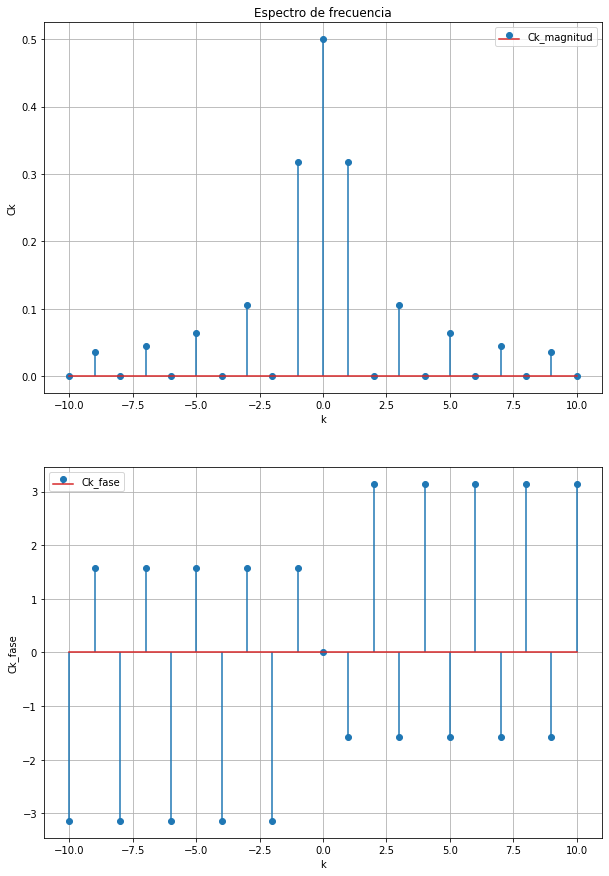

In [42]:
#Grafica de espectro de frecuencia

figura, espectro = plt.subplots(2,1, figsize=(10, 15))
espectro[0].stem(k_i, ck_m , label='Ck_magnitud', use_line_collection=True)
espectro[0].set_ylabel('Ck')
espectro[0].set_xlabel('k')
espectro[0].set_title('Espectro de frecuencia')
espectro[0].legend()
espectro[0].grid()

espectro[1].stem(k_i, ck_f , label='Ck_fase', use_line_collection=True)
espectro[1].legend()
espectro[1].set_ylabel('Ck_fase')
espectro[1].set_xlabel('k')
espectro[1].grid()

plt.show()

#Nota

En el caso de la señal `square`, a través de la Serie **Exponencial** de Fourier, a la hora de graficar la fase surge un error.Todos los valores igual a $0$ dan por resultado $π$ o $-π$.
Por el momento no se detectó por qué falla. 